# Multiple linear regression with categorical variables

This exercise is useful to see:

- an alternative way to perform multiple linear regression
- the use of categorical variables
- model fit measures

Import all the packages that we need.

In [2]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

Read the data from Carseats.csv.

In [8]:
carseats_df = pd.read_csv('Data/Carseats.csv', index_col=0)
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### a) Fit a multiple regression model to predict 'Sales' using 'Population', 'Urban', and 'US' as predictors

In [4]:
model = smf.ols('Sales ~ Population + Urban + US', data=carseats_df)
estimate = model.fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.563
Date:                Wed, 16 Apr 2025   Prob (F-statistic):            0.00371
Time:                        22:35:12   Log-Likelihood:                -975.56
No. Observations:                 400   AIC:                             1959.
Df Residuals:                     396   BIC:                             1975.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.7262      0.401     16.776   

### b) Provide an interpretation of each coefficient in the model.

The model can be represented as follows: $Sales = \beta_0 + \beta_{urban} * Urban + \beta_{US} * US + \beta_{Population} * Population$, where $Urban \in \{0,1\}$ and $US \in \{0,1\}$

Urban:  
Slope of the urban variable represents the added sales of car sales in urban locations. Negative coefficient -> urban sales declining. 
High p-value -> Not significant/We can't reject the nullhypothesis $(\beta_{Urban} = 0)$. -> drop it out of the model

US:  
Slope of the US variable represents the increased sales at US locations vs. non-US locations. Positive coefficient -> US sales increasing.
Low p-value -> significant -> $\beta_{US} \neq 0$

Population:  
Slope of the Population variable represents the increased sales in more densely populated areas. Positive coefficient -> sales in more populated areas increasing. High p-value -> Not significant/We can't reject the nullhypothesis $(\beta_{Population} = 0)$. -> drop it out of the model

### c) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [9]:
reduced_model = smf.ols('Sales ~ US', data=carseats_df)
reduced_estimate = model.fit()
print(reduced_estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.89
Date:                 Do, 17 Apr 2025   Prob (F-statistic):           0.000372
Time:                        18:33:14   Log-Likelihood:                -975.98
No. Observations:                 400   AIC:                             1956.
Df Residuals:                     398   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8230      0.234     29.215      0.0

### d) How well do the models fit the data? Produce the diagnostic plots of the reduced model.

Text(0, 0.5, 'studentized_residuals')

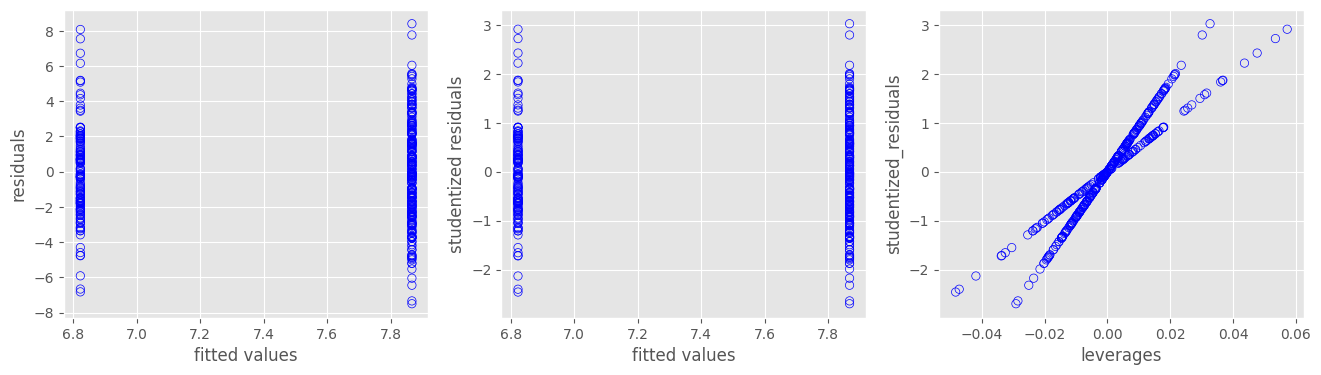

In [ ]:
# Obtain the residuals, studentized residuals and the leverages for the reduced model
fitted_values = estimate.fittedvalues
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
# Residuals
ax1.scatter(fitted_values, residuals, facecolor='none', edgecolor='b')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')
#Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolor='none', edgecolor='b')
ax2.set_xlabel('fitted values')
ax2.set_ylabel('studentized residuals')
# Leverages
ax3.scatter(leverages, studentized_residuals, facecolor='none', edgecolor='b')
ax3.set_xlabel('leverages')
ax3.set_ylabel('studentized_residuals')